In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [43]:
df=pd.read_csv('data.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [44]:
df['temperature'] = df['temperature'].apply(lambda x: (float(5)/9)*(x-32))

In [45]:
df.rename(columns={'temperature': 'temperature_celsius'}, inplace= True)

In [46]:
df.drop(['date'], axis= 1, inplace=True)
df.shape

(62184, 10)

In [82]:
X = df.iloc[:,1:10]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
X.shape

(62184, 9)

Text(0.5, 1.0, 'Correlation between different fearures')

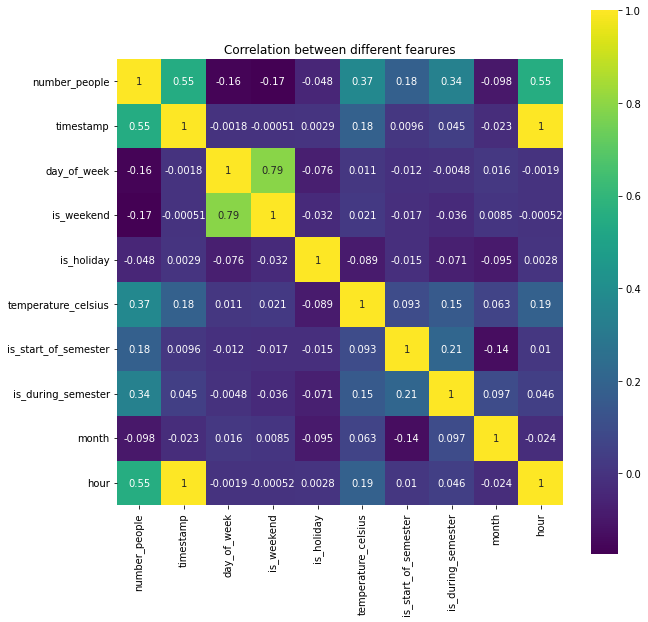

In [48]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [72]:
scaled_data =  preprocessing.scale(X)
# scaled_data = StandardScalar().fit_transform(df.T)

In [73]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


<ipython-input-74-0245dde29a4f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


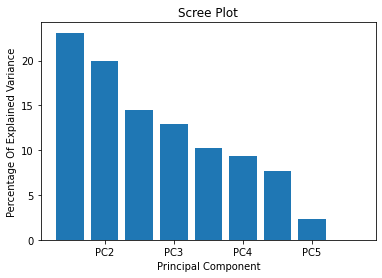

In [74]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(labels)
ax = plt.axes()
plt.bar(x=range(1,len(per_var)+1), height=per_var)
# setting label for x tick
ax.set_xticklabels(labels)
plt.ylabel('Percentage Of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [75]:
mean_vec = np.mean(scaled_data, axis=0)
cov_mat = (scaled_data - mean_vec).T.dot((scaled_data - mean_vec)) / (scaled_data.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00001608e+00 -1.79321968e-03 -5.08815704e-04  2.85078360e-03
   1.84852463e-01  9.55105884e-03  4.46766172e-02 -2.32214497e-02
   9.99093506e-01]
 [-1.79321968e-03  1.00001608e+00  7.91350923e-01 -7.58632581e-02
   1.11689106e-02 -1.17822146e-02 -4.82370614e-03  1.55589363e-02
  -1.91430511e-03]
 [-5.08815704e-04  7.91350923e-01  1.00001608e+00 -3.18993471e-02
   2.06736733e-02 -1.66460432e-02 -3.61277725e-02  8.46248251e-03
  -5.17297084e-04]
 [ 2.85078360e-03 -7.58632581e-02 -3.18993471e-02  1.00001608e+00
  -8.85280154e-02 -1.48581472e-02 -7.07995743e-02 -9.49438154e-02
   2.84321058e-03]
 [ 1.84852463e-01  1.11689106e-02  2.06736733e-02 -8.85280154e-02
   1.00001608e+00  9.32433629e-02  1.52478347e-01  6.31255958e-02
   1.85123709e-01]
 [ 9.55105884e-03 -1.17822146e-02 -1.66460432e-02 -1.48581472e-02
   9.32433629e-02  1.00001608e+00  2.09865473e-01 -1.37161817e-01
   1.00908854e-02]
 [ 4.46766172e-02 -4.82370614e-03 -3.61277725e-02 -7.07995743e-02
   1.5247

In [76]:
print('NumPy covariance matrix: \n%s' %np.cov(scaled_data.T))

NumPy covariance matrix: 
[[ 1.00001608e+00 -1.79321968e-03 -5.08815704e-04  2.85078360e-03
   1.84852463e-01  9.55105884e-03  4.46766172e-02 -2.32214497e-02
   9.99093506e-01]
 [-1.79321968e-03  1.00001608e+00  7.91350923e-01 -7.58632581e-02
   1.11689106e-02 -1.17822146e-02 -4.82370614e-03  1.55589363e-02
  -1.91430511e-03]
 [-5.08815704e-04  7.91350923e-01  1.00001608e+00 -3.18993471e-02
   2.06736733e-02 -1.66460432e-02 -3.61277725e-02  8.46248251e-03
  -5.17297084e-04]
 [ 2.85078360e-03 -7.58632581e-02 -3.18993471e-02  1.00001608e+00
  -8.85280154e-02 -1.48581472e-02 -7.07995743e-02 -9.49438154e-02
   2.84321058e-03]
 [ 1.84852463e-01  1.11689106e-02  2.06736733e-02 -8.85280154e-02
   1.00001608e+00  9.32433629e-02  1.52478347e-01  6.31255958e-02
   1.85123709e-01]
 [ 9.55105884e-03 -1.17822146e-02 -1.66460432e-02 -1.48581472e-02
   9.32433629e-02  1.00001608e+00  2.09865473e-01 -1.37161817e-01
   1.00908854e-02]
 [ 4.46766172e-02 -4.82370614e-03 -3.61277725e-02 -7.07995743e-02
  

Text(0.5, 1.0, 'Correlation between different features')

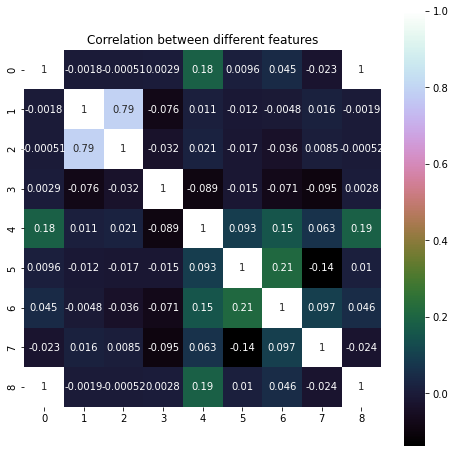

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [78]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-6.78375185e-01  7.07077464e-01 -6.23492637e-03 -4.64693511e-04
  -1.50713904e-01 -8.89446773e-03  2.87665177e-02 -1.26641828e-01
   1.22482764e-02]
 [-2.50474174e-03 -2.47614228e-04  7.03172847e-01  7.06950124e-01
  -1.36082414e-03  5.36403712e-02 -1.91735577e-02 -3.51437240e-02
  -3.57950504e-02]
 [-2.34122969e-03  2.16714902e-04  7.01042996e-01 -7.05384710e-01
  -3.33687865e-02  6.99962109e-02  7.64938225e-03  1.16871713e-02
  -6.89750084e-02]
 [ 2.43225805e-02  8.95513198e-06 -9.93926778e-02  3.88614592e-02
  -3.47124899e-01  3.63288427e-01  3.74775191e-02  1.89808616e-01
  -8.35531713e-01]
 [-2.54328513e-01  1.08616539e-04  3.01477754e-02  1.82769872e-02
   4.13390523e-01 -1.00041479e-01 -2.96856471e-02  8.66836273e-01
  -2.97938771e-02]
 [-5.63548937e-02  1.97977523e-04 -3.30320169e-02  1.90259303e-03
   4.74515670e-01  5.81409366e-01  6.37960596e-01 -1.50972872e-01
   5.23531315e-02]
 [-1.04490229e-01  6.23473423e-04 -2.60777779e-02 -2.83650838e-02
   6.30208971e

In [79]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.076466925384444
1.8017798302122539
1.308055495071198
1.1591044598824587
0.9153558451503528
0.8350146295923095
0.6967309214687256
0.20671465872009773
0.0009219686094769503


In [80]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

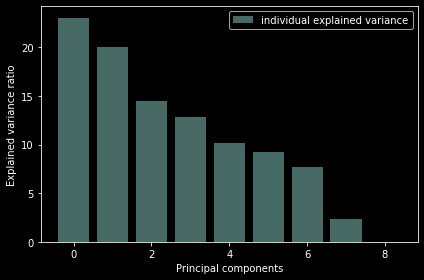

In [81]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [66]:
x  = X.columns
pca_df =  pd.DataFrame(pca_data, index= x, columns=labels)

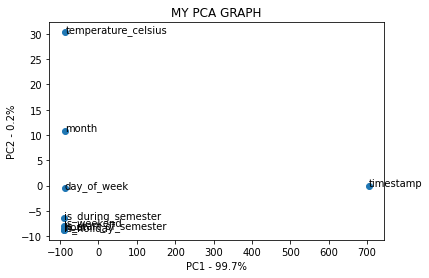

In [71]:
#plt.figure(figsize=(40, 20))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('MY PCA GRAPH')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [85]:
import random

x = ['w']* 5 + ['b'] * 4
y = ['w']* 7 + ['b'] * 6

num_trials = 1000000
trials = num_trials
result = 0

while trials > 0:
        y_new = y + [random.choice(x)]
        ball = random.choice(y_new)
        if ball == 'b':
                result += 1
        trials -= 1

print(result*1.0/num_trials)


0.460446
